In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 1) Importing libraries & data  

Firstly, we need to import necessary libraries. 

In [6]:
# Import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

Then, we need to read csv file to load train and test data into this lab 

In [7]:
# Reading data 

data_train = pd.read_csv('/kaggle/input/titanic/train.csv')

data_test = pd.read_csv('/kaggle/input/titanic/test.csv')

We would like to combine the train and test data 

In [42]:
# Combining dataset 

df = [data_train, data_test]

## 2) Data exploration 

Numerical data: continuous data is an infinite value that can be measured, discrete data is a finite value that can be counted.  
    
    Continuous: Age, Fare 
    
    Discrete: SibSp, Parch, Pclass 

Categorical data: ordinal data has an order. 
    
    Categorical: Sex, Embarked, Survived 
    
    Ordinal: Ticket, Cabin 

In [9]:
# description of train data 

data_train.info()
data_train.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# description of test data 

data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2-1) Numerical data description 

**OBSEVATIONS**
* There are 891 passengers in the train data 
* Surival rate is around 38% (342 passengers out of 891) 
* Passengers are around 29-30 years old on average, the youngest passenger less than 1 year old and the oldest 80 years old 
* Passengers have a maximum of 8 siblings or spouses
* Passengers have a maximum of 6 parents or children 
* Fare costs 32 dollars on average and can be expensive as 512 dollars 
* Age feature has some missing values 


In [11]:
# numerical feature description 

data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2-2) Categorical data description 

**OBSERVATIONS**
* Each passenger has unique name 
* There are more male passengers than female 
* Many passengers have embarked from Southampton 
* Ticket feature has many duplicates (681 unique value out of 891) 
* Cabin feature has many missing values and duplicates across the train data

In [12]:
# object feature description 

data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
# checking unique values in object column   

data_train.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## 3) Data visualization 

We would like to analyze data by visualizing it. 

### 3-1) Survival by categorical feature 

**Survival by Ticket class**
* We observe a strong correlation
* The higher the ticket class is, the higher survival rate is 

**Survival by Gender**
* We observe a strong correlation
* Female passengers are more likely to survive than male passengers  

**Survival by Embarked**
* We can see that Port C has higher survival rate, but we can't confirm if this is a direct correlation 


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


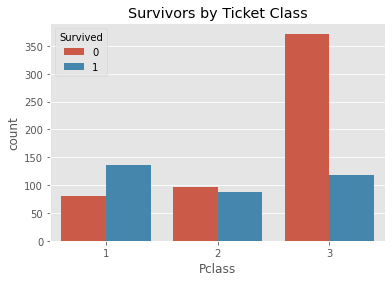

In [15]:
# Survival by ticket class 

plt.style.use('ggplot')
                                                    
sns.countplot(data=data_train, x='Pclass', hue='Survived').set(title='Survivors by Ticket Class') 

print(data_train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', 
                                                                                              ascending=False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


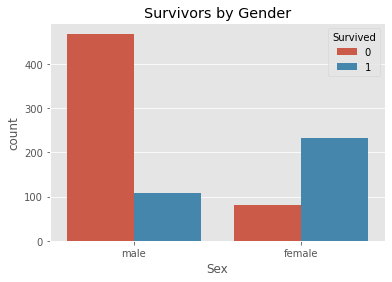

In [16]:
# Survival by Gender 

plt.style.use('ggplot')

sns.countplot(data=data_train, x='Sex', hue='Survived').set(title='Survivors by Gender')

print(data_train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', 
                                                                                        ascending=False))

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


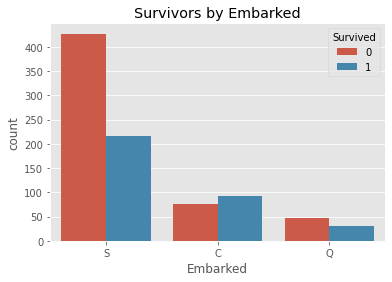

In [17]:
# Survival by Embarkment 
plt.style.use('ggplot')

sns.countplot(data=data_train, x='Embarked', hue='Survived').set(title='Survivors by Embarked')

print(data_train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', 
                                                                                                  ascending=False))

### 3-2) Survival by numeric feature 
**Survival by Sibsp** 
* Most passengers are onboard without siblings or spouses, and large number of them didn't survive 
* Passengers with one or two siblings or spouses are more likely to survive 
* We don't see a strong correlation  

**Survival by Parch**
* Most passengers are onboard without parents or children, and large number of them didn't survive
* Passengers with 1-3 parents or children are more likely to survive than those without or have more than 3 
* We don't observe a correlation 

**Survival by Age**
* Young children have high survival rate 
* Large number of passengers between 20-35 years old didn't survive 
* Few oldest passengers who are 80 years old survived  

**Survival by Fare** 
* Large number of passengers who paid the cheapest (0-50 dollars) didn't survive 
* Few passengers who paid the most expensive (512 dollars) survived 


   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


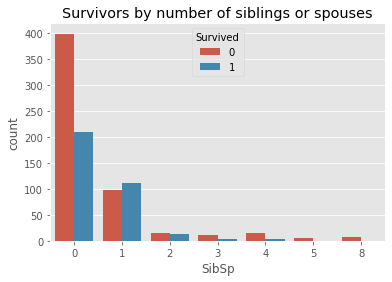

In [18]:
# Survival by Sib Sp 
plt.style.use('ggplot')

sns.countplot(data=data_train, x='SibSp', hue='Survived').set(title='Survivors by number of siblings or spouses')

print(data_train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False))


   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


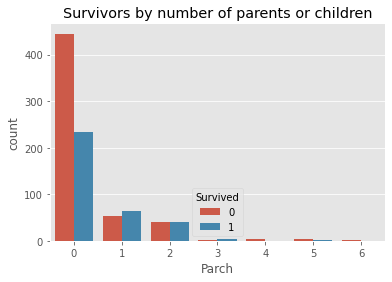

In [19]:
# Survival rate by Par ch 
plt.style.use('ggplot')

sns.countplot(data=data_train, x='Parch', hue='Survived').set(title='Survivors by number of parents or children')

print(data_train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', 
                                                                                            ascending=False)) 

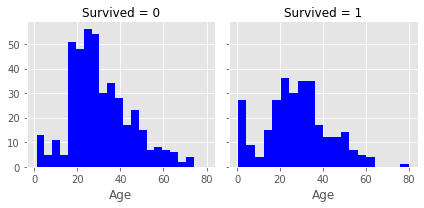

In [20]:
# Visualizing correlation between Age and Survival 

g1 = sns.FacetGrid(data_train, col='Survived')
g1.map(plt.hist, 'Age', bins= 20, color='blue')

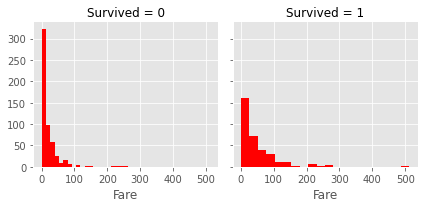

In [21]:
# Visualizing correlation between Fare and Survival 

g2 = sns.FacetGrid(data_train, col='Survived')
g2.map(plt.hist, 'Fare', bins=20, color='red')

### 3-3) Correlating numerical and ordinal features 

#### Correlation between Ticket class and Age
* Most passengers in the 3rd class didn't survive 
* Passengers in the 1st class have a higher number of survivals than 2nd or 3rd class 
* Young passengers have a higher survival rate regardless of ticket class 

#### Corrleation between Ticket class and Fare 
* The higher the ticket class, passengers are more likely to survive even if they didn't pay much
* Large number of passengers in the 3rd class didn't survive 

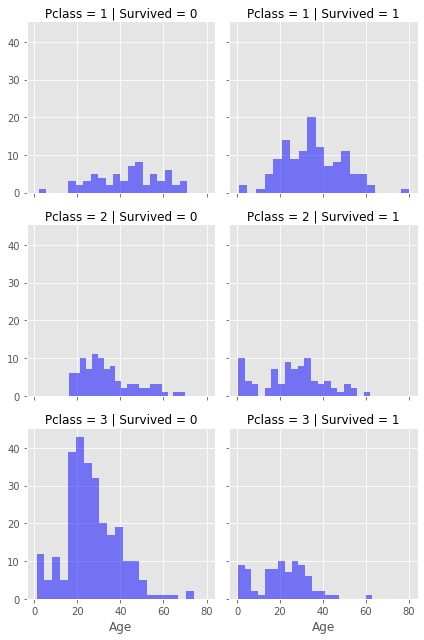

In [22]:
# Visualizing correlation between Age, Pclass and Survival 

g3 = sns.FacetGrid(data_train, col='Survived', row='Pclass')
g3.map(plt.hist, 'Age', bins=20, color='blue', alpha=.5)


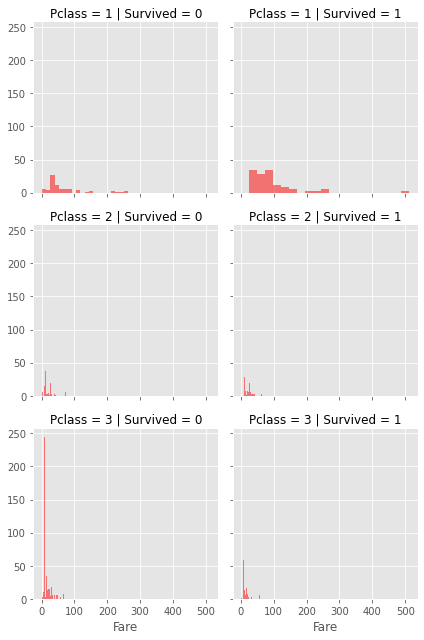

In [23]:
# Visualizing correlation between Fare, Pclass and Survival 

g4 = sns.FacetGrid(data_train, col='Survived', row='Pclass')
g4.map(plt.hist, 'Fare', bins=20, color='red', alpha=0.5)

### 3-4) Correlating categorical and numerical features 

#### Correlation between Sex, Fare and Embarked 
* Passengers who paid higher fare are more likely to survive 
* Passengers who embarked from Port C paid higher fare 
* Passengers who embarked from Port Q paid cheaper fare 

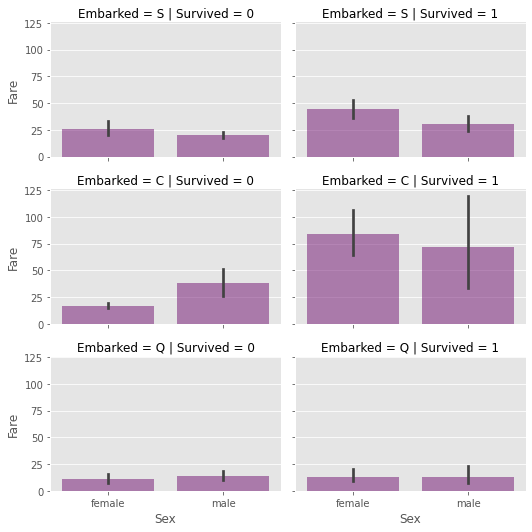

In [37]:
# Visualizing correlation between Sex, Fare and Embarked Features 

g5 = sns.FacetGrid(data=data_train, col='Survived', row='Embarked', height =2.5, aspect =1.5)
g5.map(sns.barplot, 'Sex', 'Fare', order=['female', 'male'], color='purple', alpha=0.5)


### As a result of observation: 
* PassengerId : we may drop it 
* Pclass : no need to wrangle
* Name : need to use it to extract title to create a new column 'Title' 
* Age : deal with missing value, create a age band then convert it to numeric feature 
* Sex : convert it to a numeric feature 
* SibSp : 0~8, combine with Parch column then create a new column 'IsAlone'
* Parch : 0~6, combine with SibSp column then create a new column 'IsAlone'
* Ticket : drop it 
* Fare : 0~512, create a band then convert it to numeric 
* Cabin : drop it 
* Embarked : deal with missing value, convert it to numeric 

## 4) Cleaning & Wrangling data 

### Before we proceed to select models to predict, we need to clean and wrangle data. 



### 4-1) Dropping : [Cabin], [Ticket] columns 

Based on the result of observation, we need to drop some features to speed up our analysis.

We are dropping Cabin and Ticket columns because we can't extract much information from these columns. 

There are other columns that can be removed but we need to save them for now.

In [43]:
# Remove Cabin column, it has so many missing values and not useful for analysis 

data_train = data_train.drop(columns = ['Cabin', 'Ticket'], axis = 1)
data_test = data_test.drop(['Cabin', 'Ticket'], axis=1)
df = [data_train, data_test]

### 4-2) Dealing with missing value & Creating a new column [Age_group] as numeric feature : [Age] column 

We need to deal with missing value of Age feature (19%) by filling them with mean 

In [38]:
# Dealing with missing data of Age column in train & test: filling missing value with mean (missing value 19%)

print(data_train['Age'].isnull().value_counts()) 
data_train['Age'].fillna(value=data_train['Age'].mean(), inplace=True)

print(data_test['Age'].isnull().value_counts()) 
data_test['Age'].fillna(value=data_test['Age'].mean(), inplace=True)

False    714
True     177
Name: Age, dtype: int64


In [44]:
# Confirm the number of missing values in Age column 

print(data_train['Age'].isnull().value_counts()) 
print(data_test['Age'].isnull().value_counts())

df = df = [data_train, data_test]

False    891
Name: Age, dtype: int64
False    418
Name: Age, dtype: int64


In [41]:
# Creating Age group column & convert it to numeric 

for dataset in df:  
    dataset.loc[dataset['Age'] <= 16, 'Age_group'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age_group'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),  'Age_group'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age_group'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age_group'] = 4 
    dataset['Age_group'] = dataset['Age_group'].astype(int) 

In [97]:
# Survival by Age group 

data_train[['Age_group', 'Survived']].groupby('Age_group', as_index=False).mean().sort_values(by='Age_group',ascending=True)

,Age_group,Survived
0,0,0.550000
1,1,0.344168
2,2,0.404255
3,3,0.434783
4,4,0.090909


#### [Sex] feature
We need to convert Sex feature into numerical value, female : 1 and male : 0 

In [100]:
# Converting Sex into numeric band 

for dataset in df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,2


#### [SibSp], [Parch] feature
We are going to combine these two columnes to create [IsAlone] column

In [101]:
for dataset in df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

data_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', 
                                                                                                  ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [102]:
# Survival rate by IsAlone column

for dataset in df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

data_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


#### [Fare] feature
We will create a new fare band then convert this to numeric value 


In [105]:
data_test['Fare'].fillna(data_test['Fare'].dropna().median(), inplace=True)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,3,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1,3,0


In [106]:
data_train['Fare_group'] = pd.qcut(data_train['Fare'], 4)
data_train[['Fare_group', 'Survived']].groupby(['Fare_group'], as_index=False).mean().sort_values(by='Fare_group', 
                                                                                                  ascending=True)

,Fare_group,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [107]:
for dataset in df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,NaN,S,1,2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,C85,C,2,2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,NaN,S,1,1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,C123,S,2,2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,NaN,S,2,1,1,"(7.91, 14.454]"


#### [Embarked] feature
We need to deal with missing value (2 missing value) then convert it to numeric value 

In [109]:
# Converting Embarked into numeric band 
freq_port = data_train['Embarked'].dropna().mode()[0]
freq_port

'S'

In [110]:
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,NaN,0,1,2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,C85,1,2,2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,NaN,0,1,1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,C123,0,2,2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,NaN,0,2,1,1,"(7.91, 14.454]"


## 5) Model & Prediction 

## 6) Evaluation